In [47]:
import time
import numpy as np
from qiskit import *
import matplotlib.pyplot as plt

In [48]:
from qiskit.circuit.library import QuantumVolume, EfficientSU2, TwoLocal, QFT
from pytket.extensions.qiskit import qiskit_to_tk, tk_to_qiskit, IBMQBackend

In [49]:
# def pytket_run(qc, tk_backend):
#     """Get compling results for a given circuit and Tket backend.

#     Parameters:
#         qc (QuantumCircuit): The circuit.
#         tk_backend (TketBackend): A Tket backend instance.

#     Returns:
#         int: Number of CNOT gates in compiled circuit.
#         float: Compilation time.
#     """
#     tk_qc = qiskit_to_tk(qc)
#     st = time.perf_counter()
#     tk_backend.default_compilation_pass(2).apply(tk_qc)
#     ft = time.perf_counter()
#     return tk_to_qiskit(tk_qc).count_ops()['cx'], ft-st

# TODO figure out how to use this for comparison

In [50]:
def qiskit_run(qc, backend):
    """Get compling results for a given circuit and backend.

    Parameters:
        qc (QuantumCircuit): The circuit.
        backend (IBMQBackend): An IBM Quantum backend instance.

    Returns:
        list: Number of CNOT gates in compiled circuits.
        list: Best compilation times.
    """
    qk_cx_count1 = []
    qk_cx_count2 = []
    qk_cx_count3 = []
    qk_cx_count3l = []
    qk_cx_count3s = []

    qk_time1 = []
    qk_time2 = []
    qk_time3 = []
    qk_time3l = []
    qk_time3s = []
    for kk in range(10):
        st = time.perf_counter()
        qk_cx_count1.append(
            transpile(qc, backend, optimization_level=1).count_ops()["cx"]
        )
        ft = time.perf_counter()
        qk_time1.append(ft - st)
        st = time.perf_counter()
        qk_cx_count2.append(
            transpile(qc, backend, optimization_level=2).count_ops()["cx"]
        )
        ft = time.perf_counter()
        qk_time2.append(ft - st)
        st = time.perf_counter()
        qk_cx_count3.append(
            transpile(qc, backend, optimization_level=3).count_ops()["cx"]
        )
        ft = time.perf_counter()
        qk_time3.append(ft - st)

        st = time.perf_counter()
        qk_cx_count3l.append(
            transpile(
                qc,
                backend,
                optimization_level=3,
                layout_method="sabre",
            ).count_ops()["cx"]
        )
        ft = time.perf_counter()
        qk_time3l.append(ft - st)

        st = time.perf_counter()
        qk_cx_count3s.append(
            transpile(
                qc,
                backend,
                optimization_level=3,
                layout_method="sabre",
                routing_method="sabre",
            ).count_ops()["cx"]
        )
        ft = time.perf_counter()
        qk_time3s.append(ft - st)

    return [qk_cx_count1, qk_cx_count2, qk_cx_count3, qk_cx_count3l, qk_cx_count3s], [
        np.min(qk_time1),
        np.min(qk_time2),
        np.min(qk_time3),
        np.min(qk_time3l),
        np.min(qk_time3s),
    ]

In [51]:
def compiler_benchmark(circuit, backend):
    """Benchmarks a circuit on the target backend and plot
    the results.

    Parameters:
        circuit (QuantumCircuit): The circuit to benchmark.
        backend (IBMQBackend): The target system
    """
    # tk_backend = IBMQBackend(backend.name(), group='deployed')
    tk_backend = backend

    # tk_cx_count, tk_time = pytket_run(circuit, tk_backend)
    qk_counts, qk_times = qiskit_run(circuit, backend)

    fig, ax = plt.subplots(figsize=(9, 5))
    ax.hist(
        qk_counts[0], label="Qiskit O1 [{}]".format(np.round(qk_times[0], 3)), alpha=0.7
    )
    ax.hist(
        qk_counts[1], label="Qiskit O2 [{}]".format(np.round(qk_times[1], 3)), alpha=0.7
    )
    ax.hist(
        qk_counts[2], label="Qiskit O3 [{}]".format(np.round(qk_times[2], 3)), alpha=0.7
    )
    ax.hist(
        qk_counts[3],
        label="Qiskit O3-sabre [{}]".format(np.round(qk_times[3], 3)),
        alpha=0.7,
    )
    ax.hist(
        qk_counts[4],
        label="Qiskit O3-sabre-sabre [{}]".format(np.round(qk_times[4], 3)),
        alpha=0.7,
    )
    # ax.axvline(tk_cx_count, color='k', linewidth=4, linestyle='--',
    #    label='Tket [{}]'.format(np.round(tk_time, 3)))
    ax.set_xlabel("CX count", fontsize=14)
    ax.set_ylabel("Occurance", fontsize=14)
    ax.tick_params(axis="both", labelsize=12)
    ax.legend(fontsize=14, bbox_to_anchor=(1.04, 1), loc="upper left")

In [52]:
# import a mock backend
from qiskit.providers.fake_provider import FakeVigo

backend = FakeVigo()

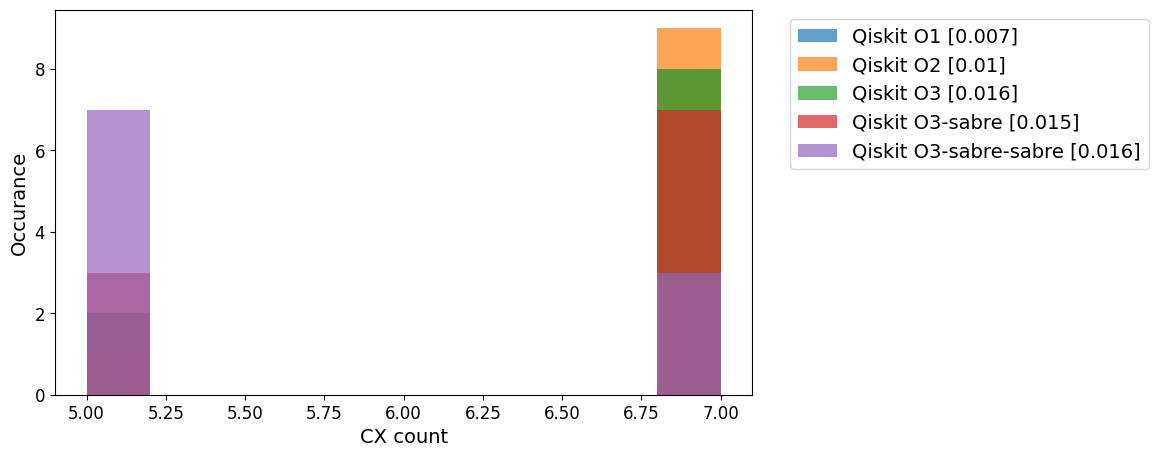

In [53]:
# GHZ
qc = QuantumCircuit(5)
qc.h(0)
qc.cx(0, range(1, 5))
compiler_benchmark(qc, backend)

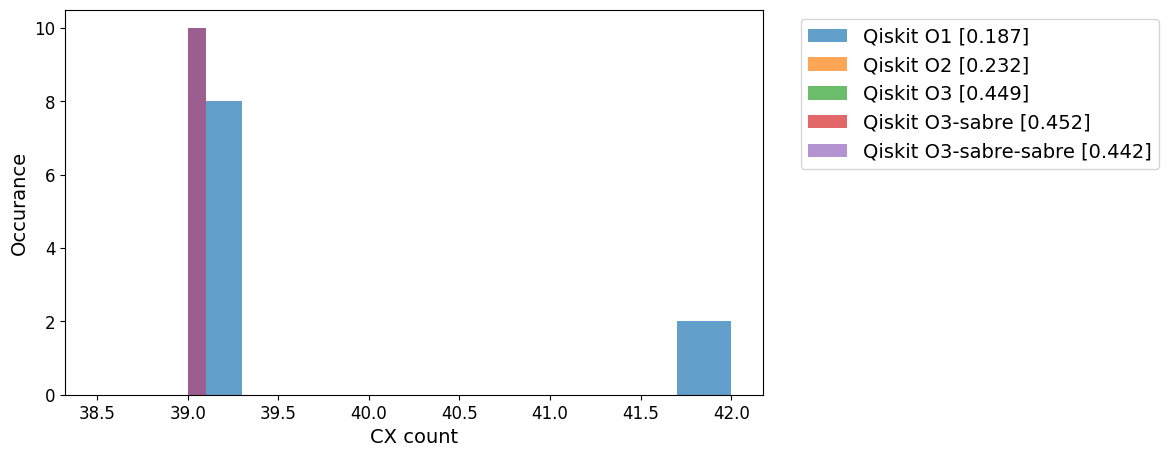

In [54]:
# Quantum Volume
qc = QuantumVolume(5)
compiler_benchmark(qc, backend)

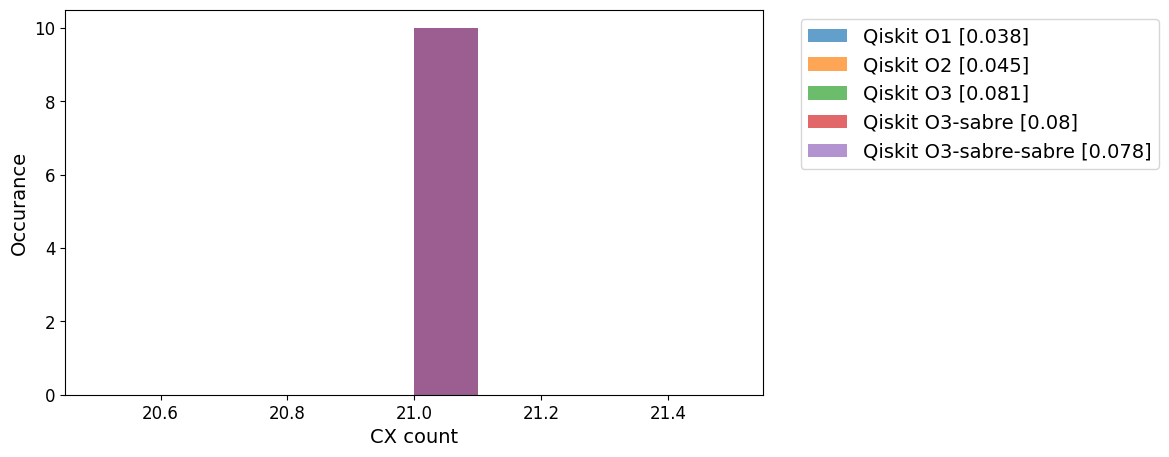

In [55]:
# Efficient SU2- Linear
qc = EfficientSU2(5, entanglement="linear")
compiler_benchmark(qc, backend)

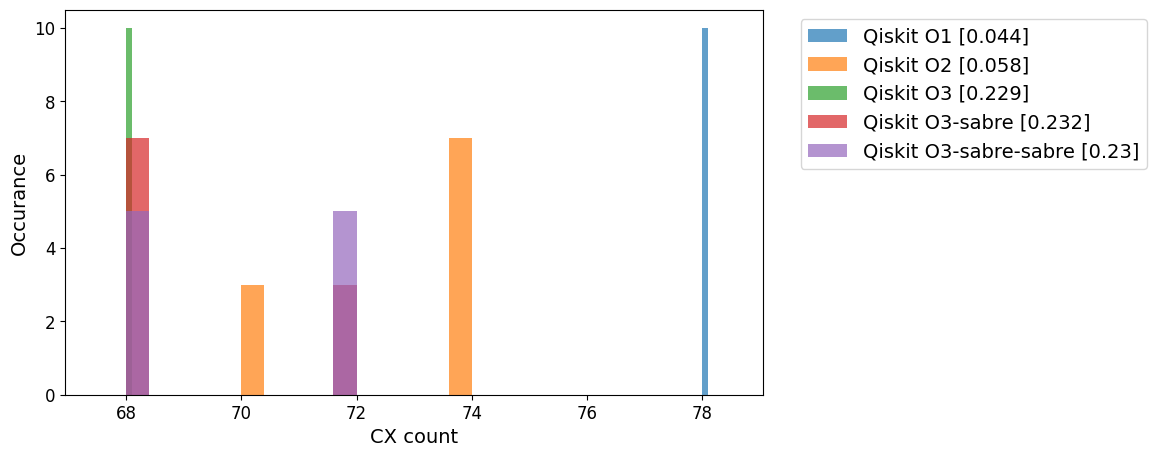

In [56]:
# Efficient SU2 - Full
qc = EfficientSU2(5, entanglement="full")
compiler_benchmark(qc, backend)

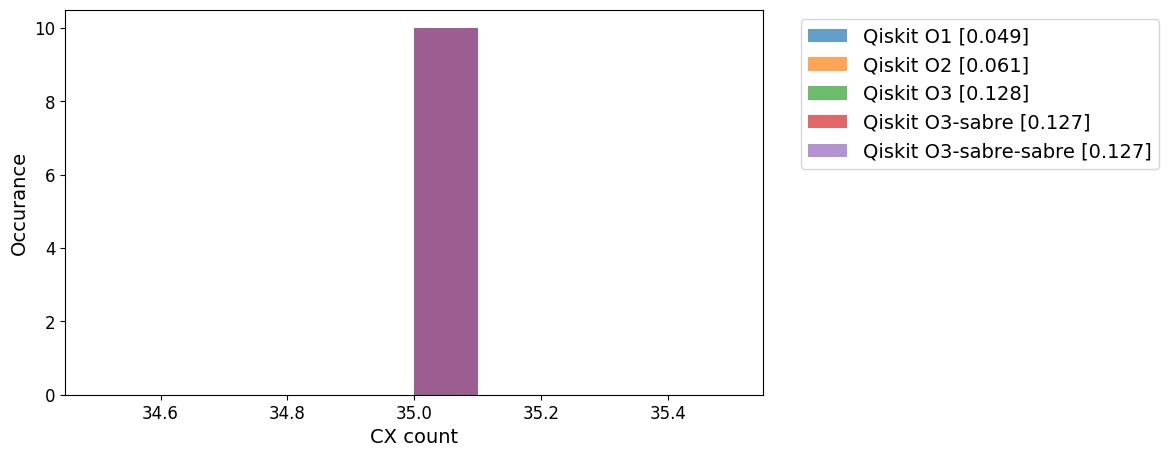

In [57]:
# Two-local linear
qc = TwoLocal(5, "ry", "cx", "linear", reps=5)
compiler_benchmark(qc, backend)

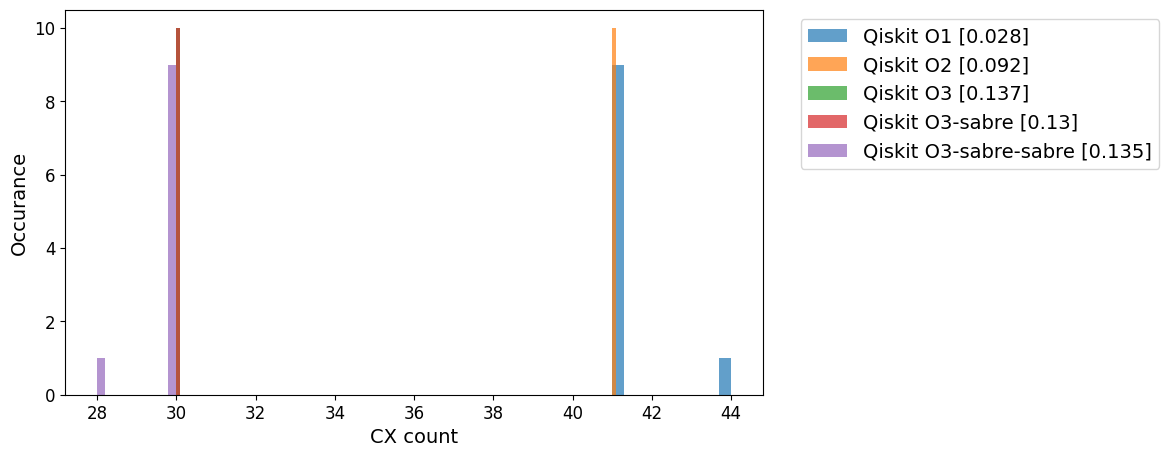

In [58]:
# QFT
qc = QFT(5)
compiler_benchmark(qc, backend)